# BAX Emittance Minimization (LCLS-II)
In this notebook, we hope to demonstrate Bayesian Algorithm Execution (BAX) in Xopt as a means of minimizing the emittance at LCLS-II. BAX is a generalization of Bayesian Optimization that seeks to acquire observations that provide our model with maximal information about our property of interest. In this example, our property of interest is the minimal emittance and its location in tuning-parameter-space. See https://arxiv.org/pdf/2209.04587.pdf for details.

In [1]:
# set up env for running on SLAC production servers
import os
os.environ['OMP_NUM_THREADS']=str(6)

In [2]:
run_dir = '/home/physics/ml_tuning/20240324_LCLS_II_Injector'

# Read pv info from YAML files

In [3]:
import sys
import yaml
sys.path.append("../../")
sys.path.append("../../../")

from common import get_pv_objects, save_reference_point, set_magnet_strengths, \
    measure_pvs

In [4]:
pv_bounds = yaml.safe_load(open("../../pv_bounds.yml"))
pv_objects = get_pv_objects("../../tracked_pvs.yml")

In [5]:
pv_bounds

{'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
 'QUAD:HTR:120:BCTRL': [-4.48, 1],
 'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
 'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
 'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
 'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
 'SOLN:GUNB:823:BCTRL': [0.021, 0.0255]}

# load reference point
Also define a function to write the reference values to the pvs

In [6]:
reference = yaml.safe_load(open("../../reference.yml"))

def reset_pvs():
    set_magnet_strengths(reference, pv_objects, validate=False)

In [7]:
reference

{'QUAD:COL0:320:BCTRL': 0.87065,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [8]:
reset_pvs()

QUAD:COL0:320:BCTRL 0.87065
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -1.8589368
QUAD:HTR:140:BCTRL 1.7526053
QUAD:HTR:300:BCTRL -1.2604819
QUAD:HTR:320:BCTRL 1.04152
SOLN:GUNB:212:BCTRL 0.0441892
SOLN:GUNB:823:BCTRL 0.025


In [9]:
from scripts.image import ImageDiagnostic, ROI
import yaml

fname = 'otr_diagnostic.yml' #run_dir + "OTRS_HTR_330_config.yml"

roi = ROI(
    ycenter=967,
    xcenter=878,
    xwidth=600,
    ywidth=600
)
    

image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.roi = roi
image_diagnostic.min_log_intensity = 5.0
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())


screen_name: OTRS:HTR:330
array_data_suffix: Image:ArrayData
array_n_cols_suffix: Image:ArraySize0_RBV
array_n_rows_suffix: Image:ArraySize1_RBV
resolution_suffix: RESOLUTION
resolution: 19.24
beam_shutter_pv: TPR:LGUN:TS01:0:TRG00_SYS2_TCTL
extra_pvs: []
background_file: null
save_image_location: /home/physics/ml_tuning/20240324_LCLS_II_Injector
roi: {xcenter: 878, ycenter: 967, xwidth: 600, ywidth: 600}
min_log_intensity: 5.0
bounding_box_half_width: 3.0
wait_time: 1.0
n_fitting_restarts: 2
visualize: false
return_statistics: false
threshold: 0.0
apply_bounding_box_constraint: true
testing: false



In [10]:
image_diagnostic.measure_background()

array([[0. , 0. , 0. , ..., 0. , 0. , 0.2],
       [0.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.2, 0. , ..., 0. , 0. , 0.4]])

displaying image
fitting image
{'Cx': 290.2776850536765,
 'Cy': 281.5726069602091,
 'Sx': 11.560924936749451,
 'Sy': 9.007093812115123,
 'bb_penalty': -236.45950891024683,
 'log10_total_intensity': 5.606616723333722,
 'total_intensity': 404218.9999999999}


{'Cx': 290.2776850536765,
 'Cy': 281.5726069602091,
 'Sx': 222.43219578305943,
 'Sy': 173.29648494509496,
 'bb_penalty': -236.45950891024683,
 'total_intensity': 404218.9999999999,
 'log10_total_intensity': 5.606616723333722}

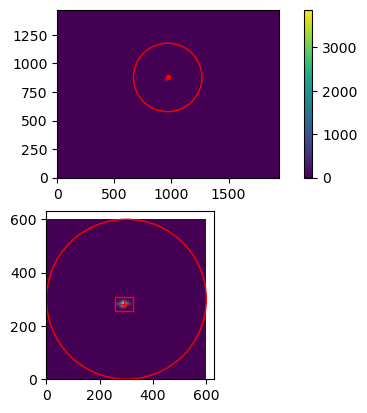

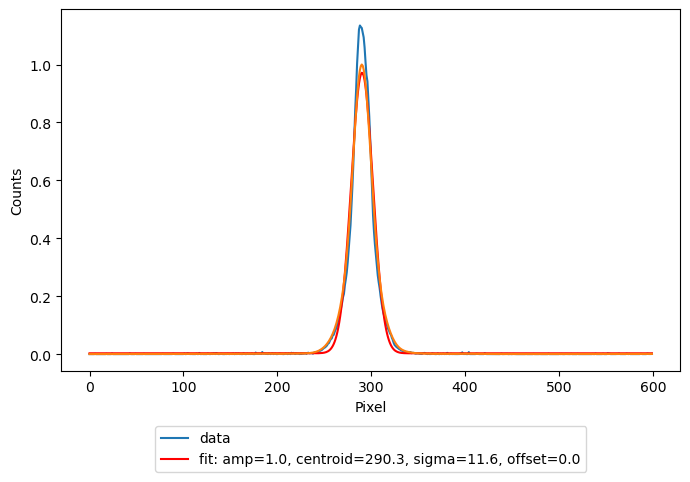

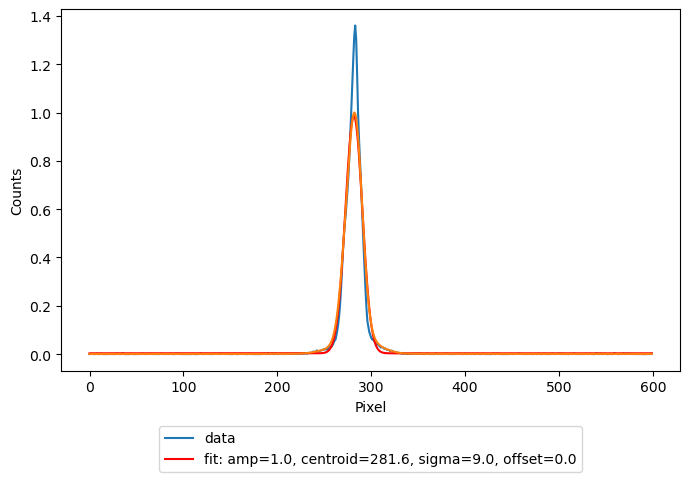

In [11]:
image_diagnostic.test_measurement()

# Imports

In [12]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
import torch
from xopt import Xopt
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
import numpy as np
import random

# Evaluator

In [13]:
import time
# define function to measure the total size on OTR4
def eval_beamsize(inputs):
    
    # set pvs and wait for BACT to settle to correct values (validate=True)
    set_magnet_strengths(inputs, pv_objects, validate=True)
    time.sleep(0.5)
    # measure all pvs - except for names in inputs
    results = measure_pvs(
        [name for name in pv_objects.keys() if name not in inputs], pv_objects 
    )

    # do some calculations
    results["time"] = time.time()

    # add beam size measurement to results dict
    beamsize_results = image_diagnostic.measure_beamsize(1)
    results["Sx_mm"] = np.array(beamsize_results["Sx"]) * 1e-3
    results["Sy_mm"] = np.array(beamsize_results["Sy"]) * 1e-3

    #add beam size squared (mm^2)
    results["xrms_sq"] = results["Sx_mm"]**2
    results["yrms_sq"] = results["Sy_mm"]**2
    results = beamsize_results | results
    return results

evaluator = Evaluator(function=eval_beamsize)


In [14]:
eval_beamsize({})

fitting image


{'Cx': 288.8150356618419,
 'Cy': 281.84792681133257,
 'Sx': 211.4917995154678,
 'Sy': 178.95384526434702,
 'bb_penalty': -236.19265933179378,
 'total_intensity': 404770.19999999995,
 'log10_total_intensity': 5.607208531371376,
 'save_filename': '/home/physics/ml_tuning/20240324_LCLS_II_Injector/OTRS_HTR_330_1711330405.h5',
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'SOLN:GUNB:823:BCTRL': 0.025,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'ACCL:GUNB:455:PDES': -121.7,
 'ACCL:L0B:0110:ADES': 6.5,
 'ACCL:L0B:0110:PDES': 0.0,
 'ACCL:L0B:0130:PDES': 0.0,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:COL0:320:BCTRL': 0.87065,
 'time': 1711330405.5633194,
 'Sx_mm': 0.2114917995154678,
 'Sy_mm': 0.17895384526434702,
 'xrms_sq': 0.04472878126229082,
 'yrms_sq': 0.032024478734895855}

## VOCS

In [15]:
# create Xopt objects
from xopt import VOCS

IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
        }

vocs = VOCS(
    variables = {
        'SOLN:GUNB:823:BCTRL': [0.0225, 0.0285],
        'QUAD:HTR:120:BCTRL': [-3.0, -0.5],
        'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
        'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
        #'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
        #'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
        #'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
    },
    constraints = IMAGE_CONSTRAINTS,
    observables = ["xrms_sq", "yrms_sq"],
)
vocs.variable_names

['QUAD:GUNB:823:1:BCTRL',
 'QUAD:GUNB:823:2:BCTRL',
 'QUAD:HTR:120:BCTRL',
 'SOLN:GUNB:823:BCTRL']

# Run Bayesian Exploration on a grid

In [16]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from xopt.numerical_optimizer import GridOptimizer
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
sys.path.append("../../emitopt/")

meas_dim = 2
tuning_dims = [0,1,3]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {
    'xrms_sq': scaled_covar_module,
    "yrms_sq": deepcopy(scaled_covar_module)
}
# covar_module_dict = {}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

generator = BayesianExplorationGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    numerical_optimizer=GridOptimizer(n_grid_points=5),
    n_interpolate_points=5
)

from xopt import Xopt
X_bayes_exp = Xopt(
    vocs=vocs,
    generator=generator,
    evaluator=evaluator,
    strict=True
)

## sample in local area around reference point

In [17]:
from epics import caget_many
from xopt.utils import get_local_region

reset_pvs()
current_value = dict(
    zip(
        X_bayes_exp.vocs.variable_names,
        caget_many(X_bayes_exp.vocs.variable_names)
    )
)
print(current_value)


random_sample_region = get_local_region(current_value,X_bayes_exp.vocs, fraction=0.1)
X_bayes_exp.random_evaluate(10, custom_bounds=random_sample_region)

QUAD:COL0:320:BCTRL 0.87065
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -1.8589368
QUAD:HTR:140:BCTRL 1.7526053
QUAD:HTR:300:BCTRL -1.2604819
QUAD:HTR:320:BCTRL 1.04152
SOLN:GUNB:212:BCTRL 0.0441892
SOLN:GUNB:823:BCTRL 0.025
{'QUAD:GUNB:823:1:BCTRL': 0.0032658, 'QUAD:GUNB:823:2:BCTRL': 0.002111, 'QUAD:HTR:120:BCTRL': -1.8589368, 'SOLN:GUNB:823:BCTRL': 0.025}
QUAD:GUNB:823:1:BCTRL 0.0035862981762737663
QUAD:GUNB:823:2:BCTRL 0.001327984409262118
QUAD:HTR:120:BCTRL -1.9103710183905065
SOLN:GUNB:823:BCTRL 0.024785671757853685
fitting image
QUAD:GUNB:823:1:BCTRL 0.003959643355152637
QUAD:GUNB:823:2:BCTRL 0.002999836551698318
QUAD:HTR:120:BCTRL -1.8189567747567452
SOLN:GUNB:823:BCTRL 0.025397593823124627
fitting image
QUAD:GUNB:823:1:BCTRL 0.002428026449775887
QUAD:GUNB:823:2:BCTRL 0.0017109375365835645
QUAD:HTR:120:BCTRL -1.6132488972634784
SOLN:GUNB:823:BCTRL 0.024774567725314164
fitting ima

,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,QUAD:HTR:120:BCTRL,SOLN:GUNB:823:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.003586,0.001328,-1.910371,0.024786,289.870374,282.141992,246.315618,163.334352,-234.939090,424816.2,...,0.0,0.0,0.87065,1.711330e+09,0.246316,0.163334,0.060671,0.026678,2.497480,False
1,0.003960,0.003000,-1.818957,0.025398,288.682727,281.058038,187.088889,223.937049,-232.618970,409748.0,...,0.0,0.0,0.87065,1.711330e+09,0.187089,0.223937,0.035002,0.050148,2.934495,False
2,0.002428,0.001711,-1.613249,0.024775,291.553485,277.311262,205.400345,379.034741,-208.743869,409363.6,...,0.0,0.0,0.87065,1.711330e+09,0.205400,0.379035,0.042189,0.143667,2.936452,False
3,0.003293,0.001623,-2.086082,0.024706,288.786906,287.069576,275.341203,223.424227,-227.795230,413368.4,...,0.0,0.0,0.87065,1.711330e+09,0.275341,0.223424,0.075813,0.049918,3.026855,False
4,0.004019,0.001310,-2.094860,0.025017,288.114408,286.181755,281.191833,238.633902,-224.437654,411856.0,...,0.0,0.0,0.87065,1.711330e+09,0.281192,0.238634,0.079069,0.056946,2.971723,False
5,0.003465,0.002376,-1.879863,0.025137,289.719983,281.958261,209.962509,181.550897,-236.762999,416550.6,...,0.0,0.0,0.87065,1.711330e+09,0.209963,0.181551,0.044084,0.032961,3.022988,False
6,0.002745,0.001310,-1.703277,0.025162,292.127881,279.845204,225.662310,295.306907,-221.028142,403510.8,...,0.0,0.0,0.87065,1.711330e+09,0.225662,0.295307,0.050923,0.087206,3.041818,False
7,0.004057,0.002795,-2.027862,0.025553,286.700130,284.930204,189.163538,186.898970,-238.468412,406973.6,...,0.0,0.0,0.87065,1.711330e+09,0.189164,0.186899,0.035783,0.034931,2.962436,False
8,0.002279,0.001518,-1.738116,0.025034,291.484692,279.731268,232.319299,286.767766,-221.104886,428751.6,...,0.0,0.0,0.87065,1.711330e+09,0.232319,0.286768,0.053972,0.082236,3.048154,False
9,0.004013,0.001427,-1.838177,0.024696,290.919146,281.518185,236.593604,182.985531,-234.245115,419523.6,...,0.0,0.0,0.87065,1.711330e+09,0.236594,0.182986,0.055977,0.033484,2.966474,False


In [18]:
import time
start = time.time()
for i in range(10):
    X_bayes_exp.step()
print(time.time() - start)

QUAD:GUNB:823:1:BCTRL 0.002212022224241027
QUAD:GUNB:823:2:BCTRL 0.0001438146310074992
QUAD:HTR:120:BCTRL -1.5705434631968302
SOLN:GUNB:823:BCTRL 0.025454583218245376
fitting image
QUAD:GUNB:823:1:BCTRL 0.00041151671515668063
QUAD:GUNB:823:2:BCTRL -0.001139638979768465
QUAD:HTR:120:BCTRL -1.3029101007927033
SOLN:GUNB:823:BCTRL 0.02621343728195777
fitting image
QUAD:GUNB:823:1:BCTRL -0.0013889887939276665
QUAD:GUNB:823:2:BCTRL -0.00242309259054443
QUAD:HTR:120:BCTRL -1.0352767383885761
SOLN:GUNB:823:BCTRL 0.026972291345670158
fitting image
QUAD:GUNB:823:1:BCTRL -0.0031894943030120124
QUAD:GUNB:823:2:BCTRL -0.0037065462013203933
QUAD:HTR:120:BCTRL -0.7676433759844492
SOLN:GUNB:823:BCTRL 0.02773114540938255
fitting image
QUAD:GUNB:823:1:BCTRL -0.004989999812096357
QUAD:GUNB:823:2:BCTRL -0.004989999812096357
QUAD:HTR:120:BCTRL -0.5000100135803223
SOLN:GUNB:823:BCTRL 0.02848999947309494
fitting image
QUAD:GUNB:823:1:BCTRL -0.004989999812096357
QUAD:GUNB:823:2:BCTRL -0.004989999812096357
QUA

In [19]:
X_bayes_exp.dump_file = "bayes_exp.yml"
X_bayes_exp.dump()

## Visualize model/data

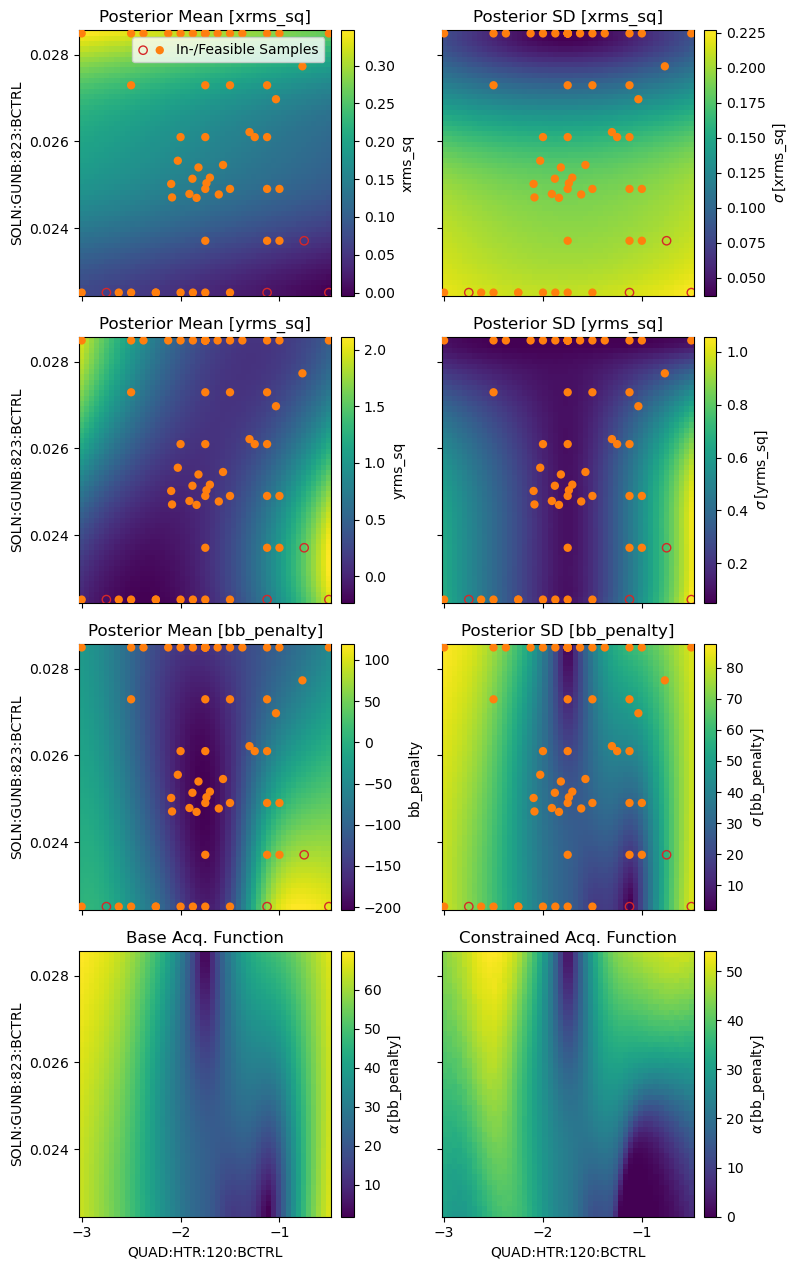

In [20]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:HTR:120:BCTRL','SOLN:GUNB:823:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:1:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:2:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)


# Run BAX

In [21]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
import torch
from emitopt.algorithms import ScipyMinimizeEmittanceXY

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {'xrms_sq': scaled_covar_module, "yrms_sq": deepcopy(scaled_covar_module)}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

QUAD_LENGTH = 0.124 # m
rmat_x = torch.tensor([[-2.3353,    4.9351],
   [-0.4769,   0.5796 ]])
rmat_y = torch.tensor([[3.1537,   5.5806],
[ 0.1835,    0.6419]])
THICK_QUAD = False
BEAM_ENERGY = 0.088 # GeV
SCALE_FACTOR = 2.74 # multiplicative factor to convert from measurement quad PV units to geometric focusing strength

algo_kwargs = {
        'x_key': "xrms_sq",
        'y_key': "yrms_sq",
        'scale_factor': SCALE_FACTOR,
        'q_len': QUAD_LENGTH,
        'rmat_x': rmat_x,
        'rmat_y': rmat_y,
        'n_samples': 20,
        'meas_dim': meas_dim,
        'n_steps_measurement_param': 11,
        'thick_quad': THICK_QUAD,
        'init': 'smallest',
        'scipy_options': {'maxiter':25},
        'jitter': 0.1
}
algo = ScipyMinimizeEmittanceXY(**algo_kwargs)

# Initialize Xopt Optimizer

In [22]:
from xopt.generators.bayesian.bax_generator import BaxGenerator



#construct BAX generator
generator = BaxGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    algorithm=algo,
    #numerical_optimizer=GridOptimizer(n_grid_points=10),
    n_interpolate_points=5
)
generator.numerical_optimizer.max_time = 10.0
generator.numerical_optimizer.n_restarts = 128

#construct Xopt optimizer and add data
X_bax = Xopt(
    evaluator=evaluator,
    generator=generator,
    vocs=vocs,
    dump_file="run_results_2024_03_24/BAX_run_be_2.yml"
)
X_bax.add_data(X_bayes_exp.data)

In [33]:
import time
start = time.time()
for i in range(10):
    print(i)
    X_bax.step()
print(time.time() - start)

0
QUAD:GUNB:823:1:BCTRL 0.003172231347504905
QUAD:GUNB:823:2:BCTRL 0.002082960059001825
QUAD:HTR:120:BCTRL -1.2179377039672494
SOLN:GUNB:823:BCTRL 0.025322080405984427
fitting image
QUAD:GUNB:823:1:BCTRL 0.003124327507404546
QUAD:GUNB:823:2:BCTRL 0.0022010424105629867
QUAD:HTR:120:BCTRL -1.5917464470506864
SOLN:GUNB:823:BCTRL 0.025279647236746673
fitting image
QUAD:GUNB:823:1:BCTRL 0.003076423667304187
QUAD:GUNB:823:2:BCTRL 0.002319124762124148
QUAD:HTR:120:BCTRL -1.9655551901341233
SOLN:GUNB:823:BCTRL 0.02523721406750892
fitting image
QUAD:GUNB:823:1:BCTRL 0.0030285198272038284
QUAD:GUNB:823:2:BCTRL 0.0024372071136853093
QUAD:HTR:120:BCTRL -2.33936393321756
SOLN:GUNB:823:BCTRL 0.025194780898271166
fitting image
QUAD:GUNB:823:1:BCTRL 0.0029806159871034695
QUAD:GUNB:823:2:BCTRL 0.0025552894652464708
QUAD:HTR:120:BCTRL -2.713172676300997
SOLN:GUNB:823:BCTRL 0.025152347729033412
fitting image
1
QUAD:GUNB:823:1:BCTRL 0.0030535995520124285
QUAD:GUNB:823:2:BCTRL 0.002561632732813086
QUAD:HTR

In [24]:
X_bax.dump()

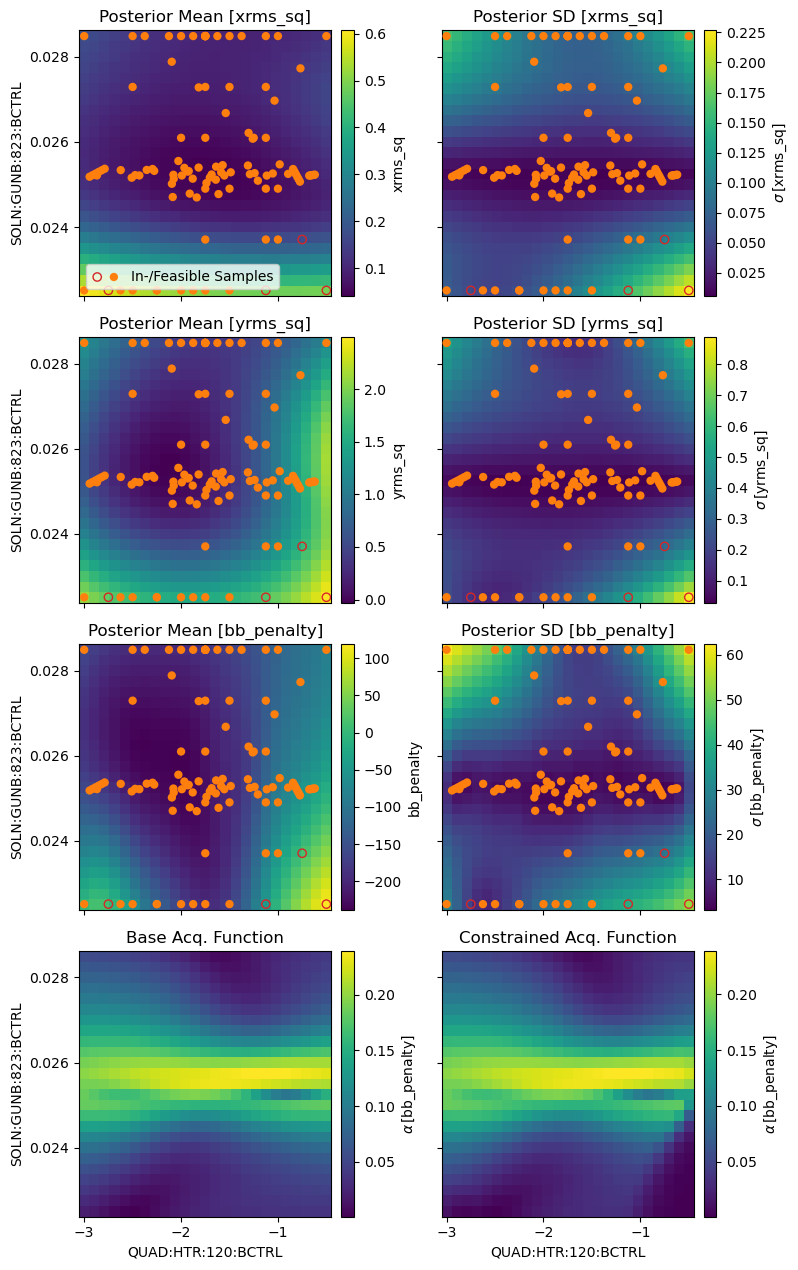

In [26]:
X_bax.generator.train_model()
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL','SOLN:GUNB:823:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
    n_grid=25
)


## view data and model

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0031, dtype=torch.float64), 'QUAD:GUNB:823:2:BCTRL': tensor(0.0022, dtype=torch.float64), 'SOLN:GUNB:823:BCTRL': tensor(0.0253, dtype=torch.float64)}


(<Figure size 900x600 with 6 Axes>,
 array([[<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Emittance'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>],
        [<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Sample Validity Rate'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>]], dtype=object))

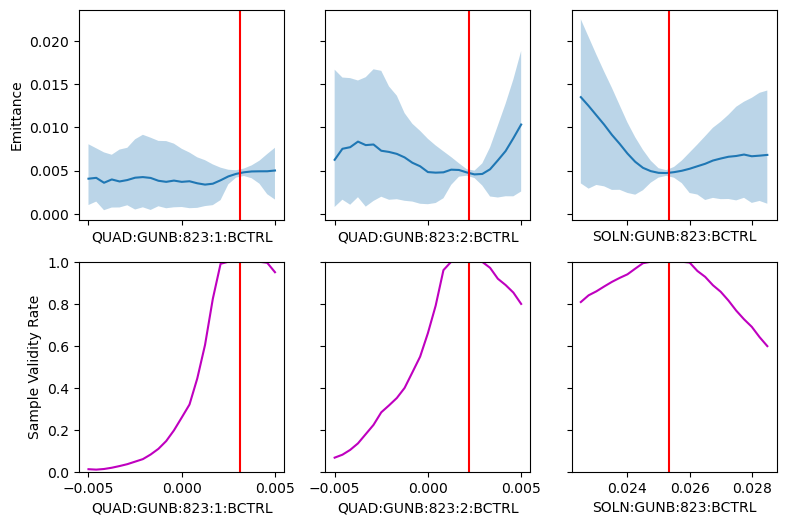

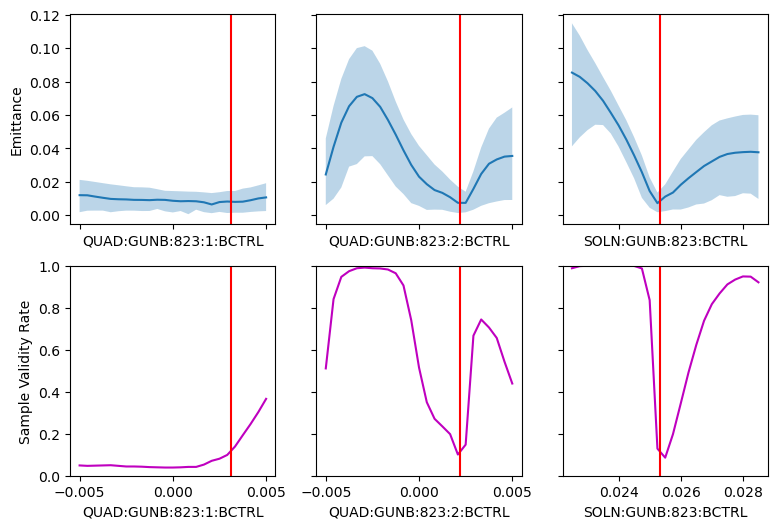

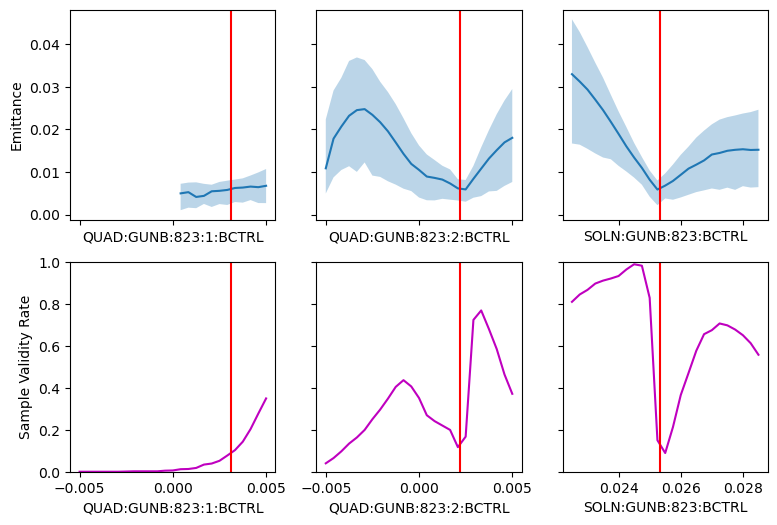

In [34]:
from emitopt.plot_utils import plot_virtual_emittance
from emitopt.utils import get_bax_optimum
best_x = get_bax_optimum(X_bax.generator)
print(best_x)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="x"
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="y"
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25
)

<Axes: >

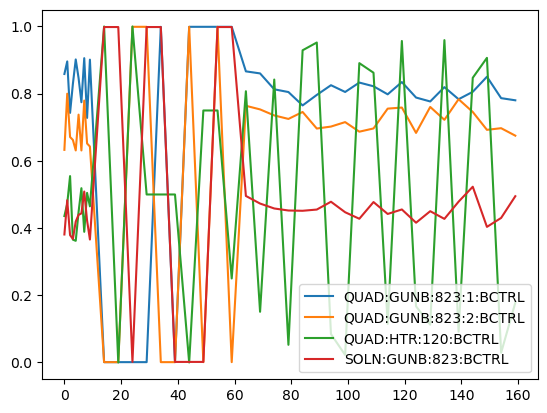

In [35]:
X_bax.vocs.normalize_inputs(X_bax.data).plot(y=X_bax.vocs.variable_names)

In [ ]:
from emitopt.plot_utils import plot_sample_optima_convergence_inputs
fig, axs = plot_sample_optima_convergence_inputs(results, show_valid_only=False)

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = best_x
)
ax[1].set_ylim(0,1.0)

In [ ]:
ax[1].set_ylim(0,0.15)
fig

In [36]:
best_x

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0031, dtype=torch.float64),
 'QUAD:GUNB:823:2:BCTRL': tensor(0.0022, dtype=torch.float64),
 'SOLN:GUNB:823:BCTRL': tensor(0.0253, dtype=torch.float64)}

In [37]:
reference

{'QUAD:COL0:320:BCTRL': 0.87065,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [38]:
best_x = {name: float(val) for name,val in best_x.items()} | {'QUAD:HTR:120:BCTRL':-2.0}

In [ ]:
best_x

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = {'SOLN:GUNB:823:BCTRL': 0.022}
)


In [39]:
X_bax.evaluate_data(best_x)

QUAD:GUNB:823:1:BCTRL 0.0031270583089966835
QUAD:GUNB:823:2:BCTRL 0.002182246924529033
SOLN:GUNB:823:BCTRL 0.025324079405235102
QUAD:HTR:120:BCTRL -2.0
fitting image


,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,SOLN:GUNB:823:BCTRL,QUAD:HTR:120:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.003127,0.002182,0.025324,-2.0,290.71405,285.07451,209.209306,180.998973,-239.850826,411618.2,...,0.0,0.0,0.87065,1.711333e+09,0.209209,0.180999,0.043769,0.032761,2.781434,False


In [ ]:
X_bax.evaluate_data({'SOLN:GUNB:823:BCTRL': 0.028, 'QUAD:HTR:120:BCTRL': -2.0})